In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('winequality-red.csv')

In [4]:
print(df.shape)

(1599, 12)


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory data analysis

### checking missing values

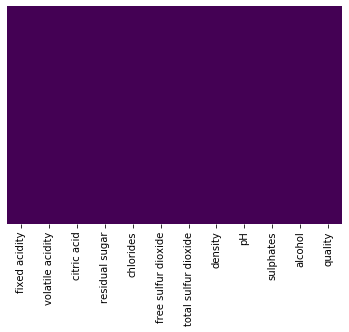

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Classifing GOOD and BAD using Label Encoding

In [7]:
df['quality']=pd.cut(df['quality'],bins=(2,6.5,8),labels=['Bad','Good'])

In [8]:
from sklearn.preprocessing import LabelEncoder
category=LabelEncoder()
df['quality']=category.fit_transform(df['quality'])

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False


In [12]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

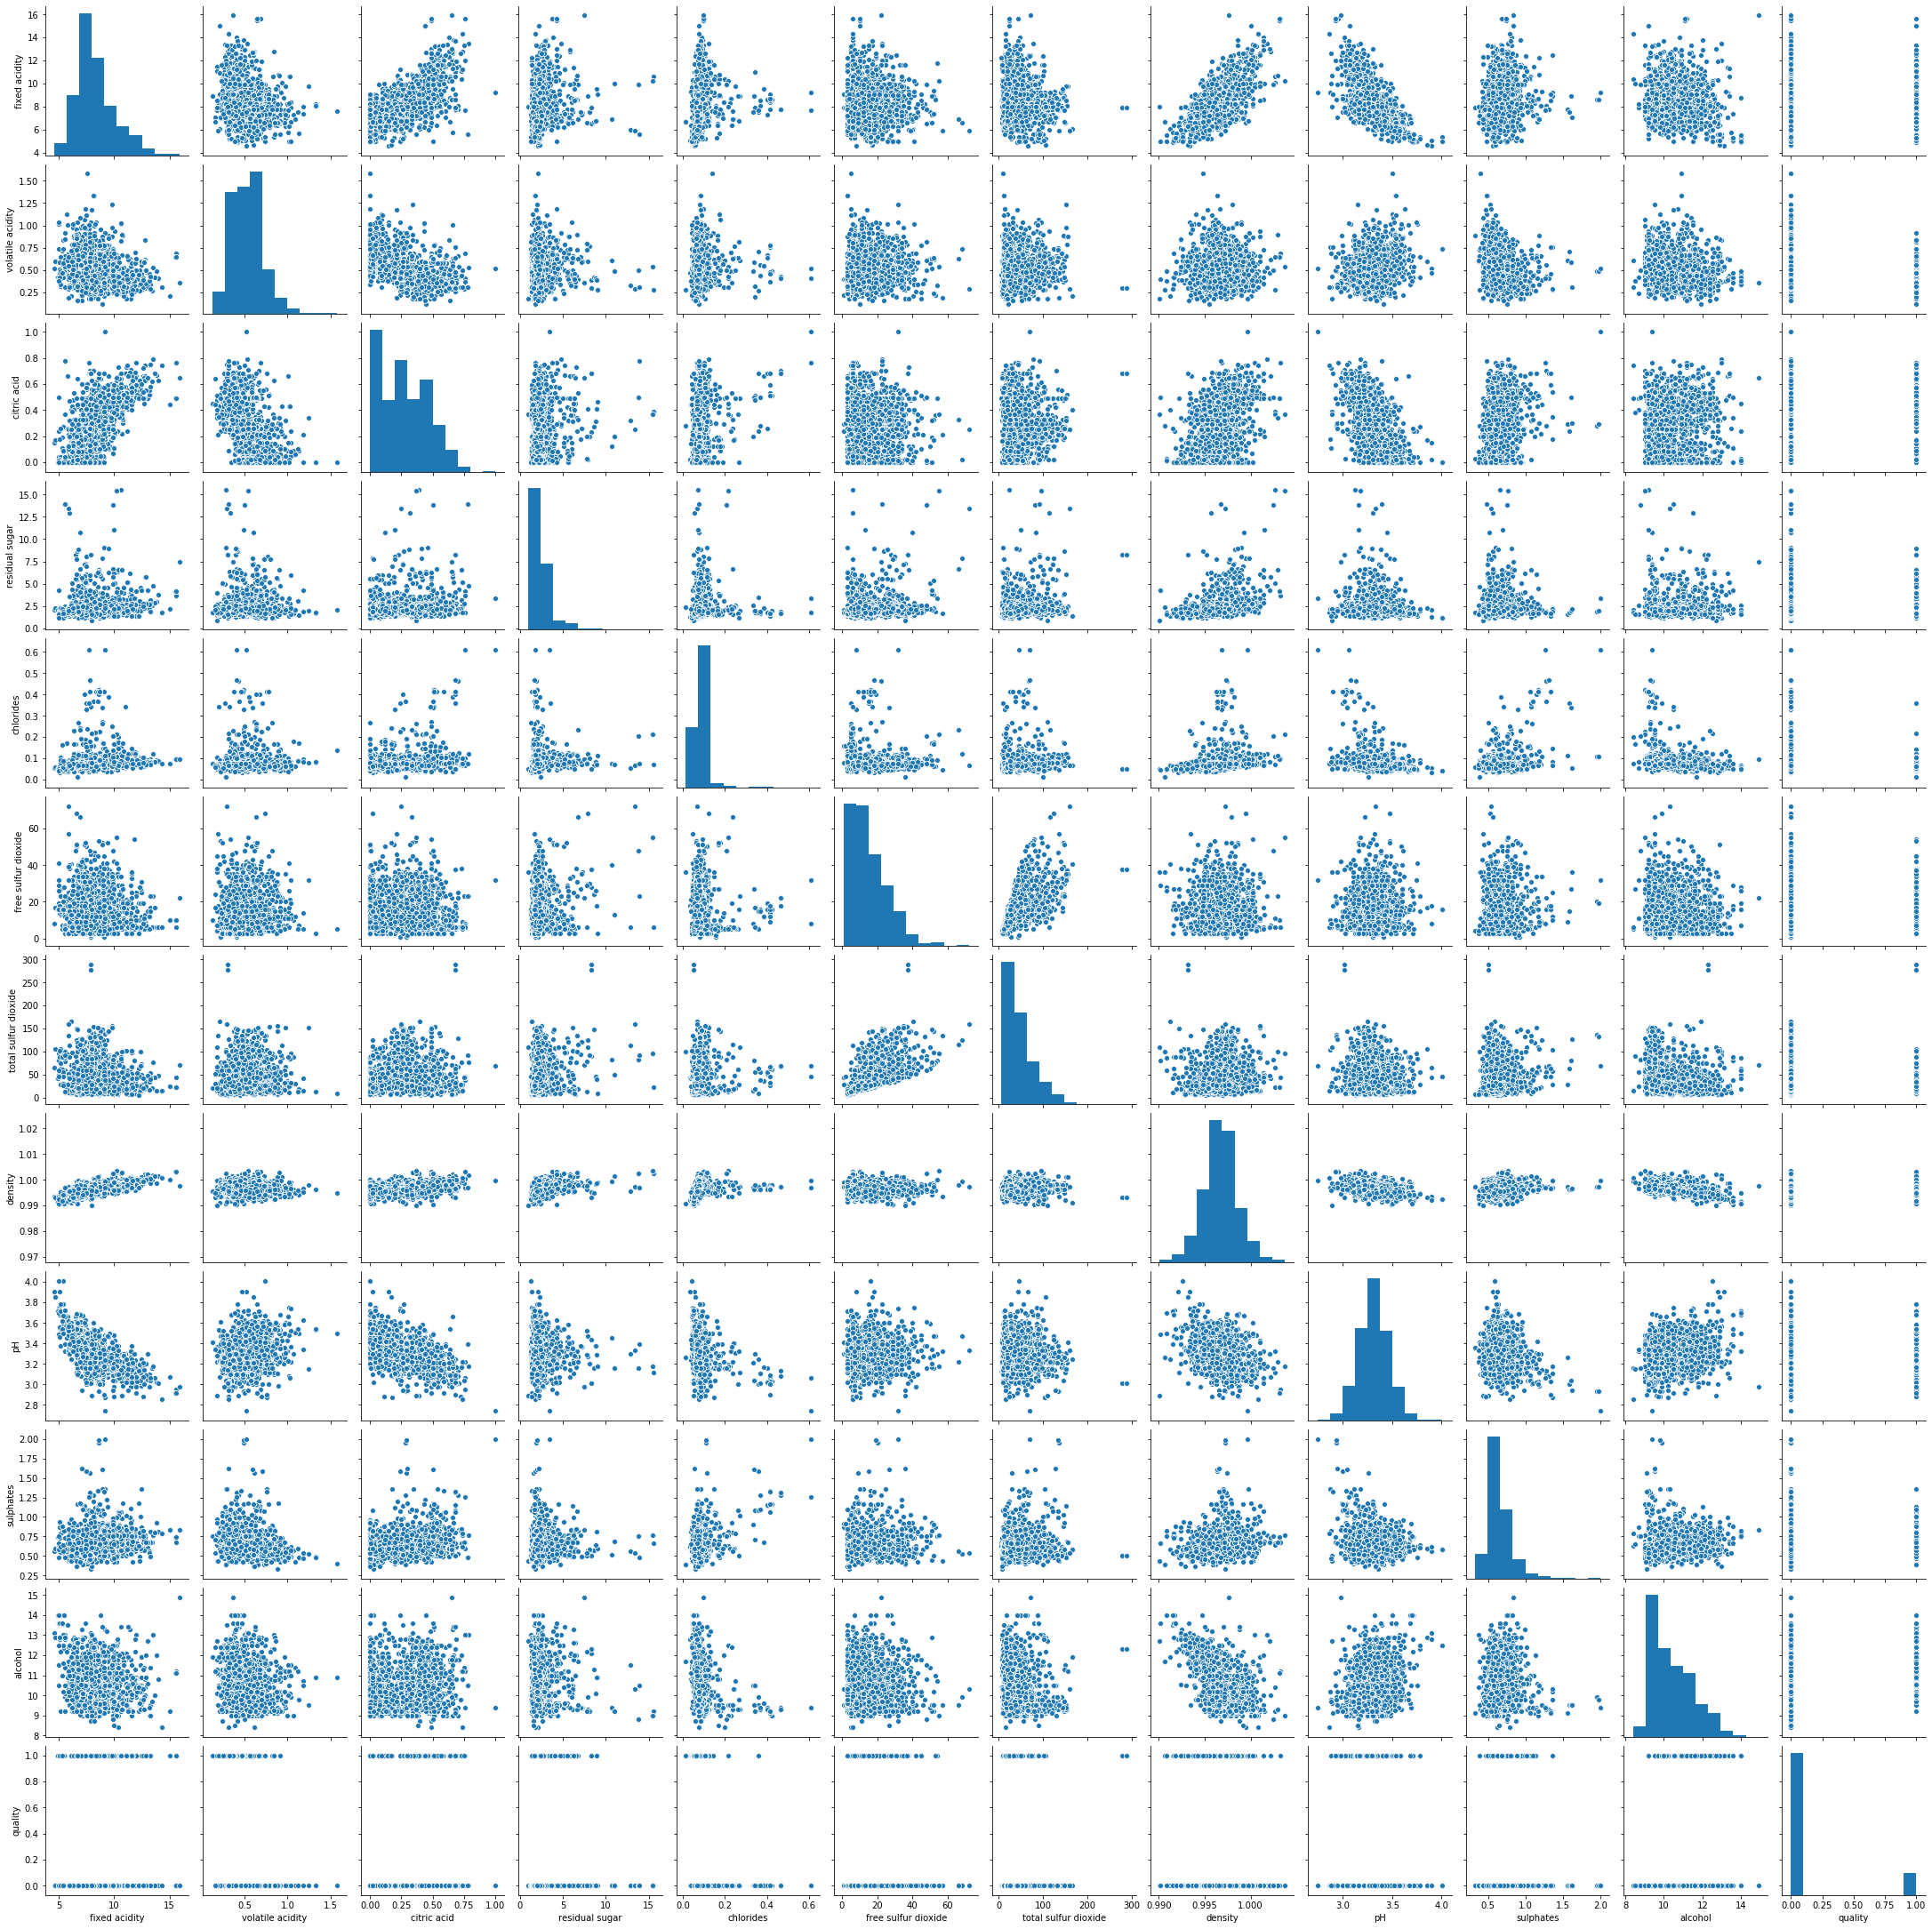

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


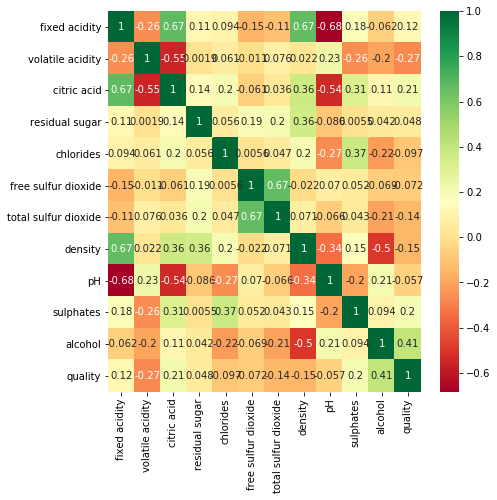

In [15]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(7,7))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [16]:
corrmat.index

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# finding the feature importance

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
print(model.feature_importances_)

[0.07129424 0.09783909 0.09460377 0.07108046 0.06254563 0.06522408
 0.07565954 0.06591581 0.06537189 0.12088522 0.20958027]


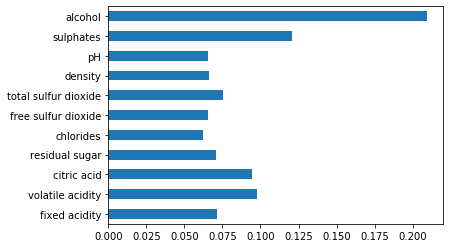

In [20]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Standardization

### minmax scalar

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [23]:
X_train=min_max.fit_transform(X_train)
X_test=min_max.fit_transform(X_test)

In [24]:
y_train.head()

140     0
1232    0
720     0
77      0
39      0
Name: quality, dtype: int32

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(reg.coef_)

[ 0.51863111 -0.36057377  0.08421996  0.43813649 -0.33911886 -0.0515159
 -0.13943529 -0.65338587  0.19065878  0.56536856  0.44422541]


In [27]:
print(reg.intercept_)

0.0758804519775747


In [28]:
print('coeff of determination R^2---on train set: {}'.format(reg.score(X_train,y_train)))
print('coeff of determination R^2---on test set: {}'.format(reg.score(X_test,y_test)))

coeff of determination R^2---on train set: 0.25511489023710565
coeff of determination R^2---on test set: 0.07087851809532442


In [29]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(reg,X,y,cv=5)

In [30]:
score.mean()

0.16381700048302444

In [31]:
coeff_df=pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])

In [32]:
coeff_df

,Coefficient
fixed acidity,0.518631
volatile acidity,-0.360574
citric acid,0.084220
residual sugar,0.438136
chlorides,-0.339119
free sulfur dioxide,-0.051516
total sulfur dioxide,-0.139435
density,-0.653386
pH,0.190659
sulphates,0.565369


In [33]:
prediction=reg.predict(X_test)

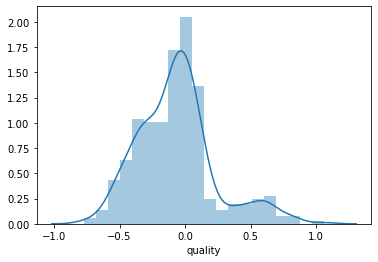

In [34]:
sns.distplot(y_test-prediction)

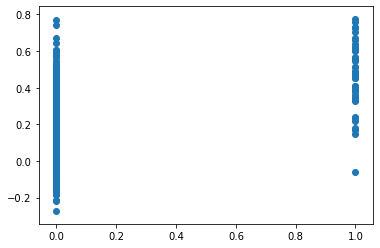

In [35]:
plt.scatter(y_test,prediction)

In [36]:
from sklearn import metrics

In [37]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMAE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.22883669576553958
MSE: 0.09276697295891996
RMAE: 0.30457671112368384


# Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [39]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,4045,50,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 4045, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1e-08}
-0.09199601678786651


### Model Evaluation

In [41]:
prediction1=ridge_reg.predict(X_test)

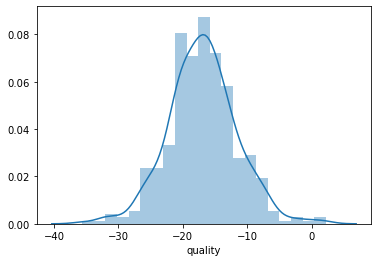

In [42]:
sns.distplot(y_test-prediction1)

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction1))
print('MSE:', metrics.mean_squared_error(y_test,prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction1)))

MAE: 16.983737308246543
MSE: 316.5762401435688
RMSE: 17.792589472686902


# Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [46]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,4045,50,55,100]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 4045, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [47]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1e-15}
-0.09199601901319322


### Model Evaluation

In [48]:
prediction2=lasso_reg.predict(X_test)

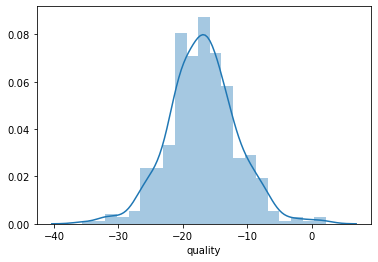

In [49]:
sns.distplot(y_test-prediction2)

In [50]:
from sklearn import metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction2))
print('MSE:', metrics.mean_squared_error(y_test,prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction2)))

MAE: 16.983934139856874
MSE: 316.58355847984024
RMSE: 17.792795128361373


# Decisiion tree Classifier

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
dtree=DecisionTreeClassifier()

In [178]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [179]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [180]:
score.mean()

0.805503526645768

### model evaluation

In [181]:
prediction3=dtree.predict(X_test)

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       355
           1       0.26      0.47      0.34        45

    accuracy                           0.79       400
   macro avg       0.59      0.65      0.61       400
weighted avg       0.85      0.79      0.82       400



In [183]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction3))

0.7925


### Hyperparameter tuning

In [184]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [185]:
params={"splitter":["best","random"],
       "max_depth":[3,4,5,6,8,10,12,15],
       "min_samples_leaf":[1,2,3,4,5],
       "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
       "max_features":["auto","log2","sqrt",None],
       "max_leaf_nodes":[None,10,20,30,40,50,60,70]}

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
random_search=GridSearchCV(dtree,param_grid=params,scoring="neg_mean_squared_error",n_jobs=-1,cv=10,verbose=3)

In [188]:
random_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 4088 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 7672 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 17912 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 24568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 32248 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 40952 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 50680 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 61432 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 73208 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 86008 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 99832 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 10240

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                       

In [189]:
print(random_search.best_params_)

{'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [190]:
print(random_search.best_score_)

-0.12258254716981132


In [191]:
random_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')

In [194]:
dtree1=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')

In [195]:
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')

In [196]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [197]:
score.mean()

0.806753526645768

### model evaluation

In [201]:
predictions3=dtree1.predict(X_test)

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       355
           1       0.00      0.00      0.00        45

    accuracy                           0.89       400
   macro avg       0.44      0.50      0.47       400
weighted avg       0.79      0.89      0.83       400



C:\Users\chepp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions3))

0.8875


# Random Forest Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)

In [205]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [206]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)

In [207]:
score.mean()

0.8730485893416928

### model evaluation

In [208]:
predictions4=rfc.predict(X_test)

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       355
           1       0.50      0.42      0.46        45

    accuracy                           0.89       400
   macro avg       0.71      0.68      0.70       400
weighted avg       0.88      0.89      0.88       400



In [210]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions4))

0.8875


# Hyper parameter tuning

In [211]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [212]:
random_grid={
    # Number of trees in random forest
    'n_estimators': [int(x) for x in np.linspace(start=100,stop=1200,num=12)],
    # Number of features to consider at every split         
    'max_features': ['auto','sqrt'],
    # Maximum number of levels in tree         
    'max_depth': [int(x) for x in np.linspace(5,30, num=6)],
    # Minimum number of samples required to split a node         
    'min_samples_split': [2,5,10,15,100],
    # Minimum number of samples required at each leaf node         
    'min_samples_leaf': [1,2,5,10]}

In [213]:
rf=RandomForestClassifier()

In [214]:
random_search=RandomizedSearchCV(rf,
                                 param_distributions=random_grid,
                                 scoring='neg_mean_squared_error',
                                 n_iter=100,
                                 cv=5,
                                 verbose=2,
                                 random_state=0,
                                 n_jobs=1)

In [215]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=500, min_samples_split=10

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.7s
[CV] n_estimators=900, min_samples_split=10, min_sam

[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=10, total=   3.7s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=15, min_s

[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   4.6s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=500, min_

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   6.2s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   7.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   4.6s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   4.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   4.4s
[CV] n_estimators=800, min_samples_split=15, m

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=   6.1s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=   6.3s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=   6.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   4.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   4.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   4.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   4.3s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.8s
[CV] n_estimators=200, min_samples

[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.8s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=1200, min_sample

[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   4.9s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   5.1s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   5.0s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   5.1s
[CV] n_estimators=1100, min_samples_split=

[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   4.9s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   5.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=400, min_samples_split

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=200, min_samples_split=2, min

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.2s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=10, min_s

[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 23.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [216]:
random_search.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [217]:
random_search.best_score_

-0.10341352859135286

In [218]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
rdm_search=RandomForestC(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [222]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rdm_search,X,y,cv=5)

In [223]:
score.mean()

0.8711716300940437

### model evaluation

In [224]:
predictions4=rdm_search.predict(X_test)

In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       355
           1       0.44      0.36      0.40        45

    accuracy                           0.88       400
   macro avg       0.68      0.65      0.66       400
weighted avg       0.87      0.88      0.87       400



In [226]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions4))

0.8775


# SVM

In [227]:
from sklearn import svm
svm_model=svm.SVC() 

In [228]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [229]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svm_model,X,y,cv=5)

In [230]:
score.mean()

0.8642907523510971

### model evaluation

In [231]:
predictions5=svm_model.predict(X_test)

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       355
           1       0.62      0.36      0.45        45

    accuracy                           0.90       400
   macro avg       0.77      0.66      0.70       400
weighted avg       0.89      0.90      0.89       400



In [233]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions5))

0.9025


# Hyper-Parameter Tuning

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [235]:
svm=svm.SVC()

In [236]:
param_grid={'C':[0.1,1,10,100,1000,10000],
           'kernel':('linear','rbf'),
           'gamma': [1,2,3,4,5,6,7,8,9,10]}

In [237]:
grid_search=GridSearchCV(svm,
                        param_grid=param_grid,
                        verbose=False,
                        scoring='accuracy',
                        cv=15,
                        n_jobs=-1)

In [238]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=False)

In [242]:
grid_search.best_params_

{'C': 10, 'gamma': 8, 'kernel': 'rbf'}

In [243]:
grid_search.best_score_

0.8865400843881857

In [244]:
grid_search.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=8, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [246]:
from sklearn import svm
svm1=svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=8, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [247]:
svm1.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=8, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [248]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svm1,X,y,cv=5)

In [249]:
score.mean()

0.8655407523510972

### model evaluation

In [250]:
predictions6=svm1.predict(X_test)

In [251]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions6))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       355
           1       0.51      0.47      0.49        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.71       400
weighted avg       0.89      0.89      0.89       400



In [255]:
from sklearn.metrics import precision_score
print(precision_score(y_test,predictions6))

0.5121951219512195


In [258]:
from sklearn.metrics import f1_score
print(f1_score(y_test,predictions6))

0.48837209302325585


# KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() 

In [107]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [108]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,X,y,cv=5)

In [109]:
score.mean()

0.8449235893416928

### model evaluation

In [110]:
predictions7=knn.predict(X_test)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions7))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       355
           1       0.47      0.62      0.53        45

    accuracy                           0.88       400
   macro avg       0.71      0.77      0.73       400
weighted avg       0.90      0.88      0.88       400



In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions7))

0.8775


# Hyper Parameter tuning

In [124]:
leaf_size=list(range(1,50))
n_neighbors=list(range(1,40))
p=[1,2]

In [125]:
params=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)

In [126]:
knn_1=KNeighborsClassifier()

In [127]:
grd_search=GridSearchCV(knn_1,params,cv=10)

In [128]:
best_model=grd_search.fit(X_train,y_train)

In [129]:
best_model.best_params_

{'leaf_size': 1, 'n_neighbors': 16, 'p': 1}

In [130]:
best_model.best_score_

0.8765756302521008

In [131]:
predictions8=best_model.predict(X_test)

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions8))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       355
           1       0.42      0.33      0.37        45

    accuracy                           0.87       400
   macro avg       0.67      0.64      0.65       400
weighted avg       0.86      0.87      0.87       400



In [133]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions8))

0.8725


# XGBoost Classifier

In [134]:
import xgboost
xg_model=xgboost.XGBClassifier()

In [135]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [136]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xg_model,X,y,cv=5)

In [137]:
score.mean()

0.861790752351097

### model evaluation

In [138]:
predictions9=xg_model.predict(X_test)

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions9))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       355
           1       0.42      0.42      0.42        45

    accuracy                           0.87       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.87      0.87      0.87       400



In [140]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions9))

0.87


# Hyper Parameter Tuning

In [166]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [167]:
classifier=xgboost.XGBClassifier()

In [168]:
params1={"learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
        "max_depth":[3,4,5,6,8,10,12,15],
        "min_child_weight":[1,3,5,7],
        "gamma":[0.0,0.1,0.2,0.3,0.4],
        "colsample_bytree":[0.3,0.4,0.5,0.7]}

In [169]:
rdm_search=RandomizedSearchCV(classifier,params1,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [170]:
rdm_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [171]:
rdm_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [172]:
rdm_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [155]:
classifier1=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [160]:
classifier1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [161]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier1,X,y,cv=5)

In [162]:
score.mean()

0.8605485893416928

### model evaluation

In [163]:
predictions5=classifier1.predict(X_test)

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       355
           1       0.31      0.09      0.14        45

    accuracy                           0.88       400
   macro avg       0.60      0.53      0.54       400
weighted avg       0.83      0.88      0.84       400



In [165]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions5))

0.875
